In [2]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import math 
import rasterio

from shapely.geometry import Polygon
import fiona
import pandas as pd
import geopandas as gpd
from geopandas.tools import sjoin
import shapefile

from sklearn.preprocessing import MinMaxScaler
import json


In [3]:
# CITATIONS:
# Lithium concentrations in water:  https://geology-ags-aer.opendata.arcgis.com/datasets/lithium-content-in-groundwater-and-formation-water-dig-2019-0029/explore, obtained 2024-02-06
# Indigenous Communities: https://native-land.ca/, obtained 2024-02-06
# Exploration Projects: https://geology-ags-aer.opendata.arcgis.com/datasets/prospective-areas-for-mineral-exploration-dig-2019-0025/explore, obtained 2024-02-06
# Bedrock Temperatures: https://ags.aer.ca/publication/dig-2021-0031, obtained 2024-02-06
# Bedrock geology: https://www.arcgis.com/home/item.html?id=8ffb78beb46746f4939df49ccc3d65da, obtained 2024-02-06
# Earthquakes: https://ags-aer.shinyapps.io/Seismicity_waveform_app/, obtained 2024-02-06

In [4]:
# import lithium concentrations
lithium_df = gpd.read_file('Lithium_Content_in_Groundwater_and_Formation_Water_(DIG_2019-0029).geojson')

In [5]:
lithium_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1635 entries, 0 to 1634
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    1635 non-null   int64   
 1   AGS_LITHID  1635 non-null   object  
 2   Site_ID     1635 non-null   int64   
 3   UWI         1635 non-null   object  
 4   Lat_NAD83   1635 non-null   float64 
 5   Long_NAD83  1635 non-null   float64 
 6   Li_mg_L     1635 non-null   object  
 7   Geo_Unit    1635 non-null   object  
 8   Gr_El_masl  1635 non-null   float64 
 9   KB_El_masl  1635 non-null   float64 
 10  T_Depth_m   1635 non-null   float64 
 11  B_Depth_m   1635 non-null   float64 
 12  M_Depth_m   1635 non-null   float64 
 13  Cat_An_Bal  1635 non-null   float64 
 14  Comments    1635 non-null   object  
 15  Report_No   1635 non-null   object  
 16  Reference   1635 non-null   object  
 17  Pub_by      1635 non-null   object  
 18  Date_Samp   903 non-null    object  
 19

In [6]:
lithium_df["Li_mg_L"] = pd.to_numeric(lithium_df["Li_mg_L"], errors="coerce")
lithium_df["Li_mg_L"].dropna(inplace=True)

In [7]:
lithium_df = lithium_df.to_crs("EPSG:4269")

<Axes: >

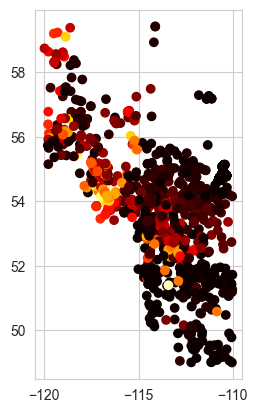

In [8]:
lithium_df.plot(column= "Li_mg_L", cmap="hot")

In [9]:
# import indigenous communities
indigenous_df = gpd.read_file('nativelands_territories.json')

In [10]:
indigenous_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           2059 non-null   object  
 1   Name         2059 non-null   object  
 2   ID           2059 non-null   int64   
 3   Slug         2059 non-null   object  
 4   description  2059 non-null   object  
 5   color        2059 non-null   object  
 6   geometry     2059 non-null   geometry
dtypes: geometry(1), int64(1), object(5)
memory usage: 112.7+ KB


In [12]:
world = gpd.read_file("ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
canada = world[world.NAME == "Canada"]

In [13]:
canada.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
indigenous_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

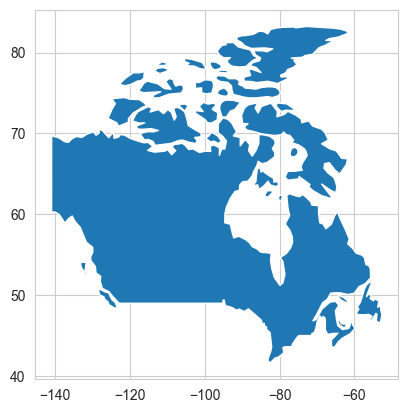

In [15]:
canada.plot()

In [16]:
canada = canada.to_crs("EPSG:4269")

<Axes: >

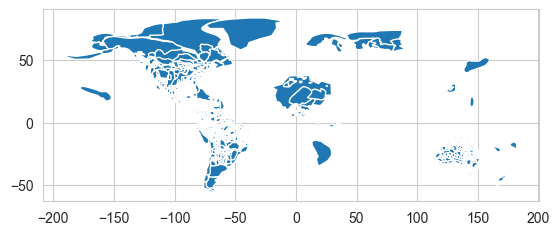

In [17]:
indigenous_df.plot()

In [18]:
indigenous_df = indigenous_df.to_crs("EPSG:4269")

In [19]:
indigenous_df_filtered = sjoin(indigenous_df, canada, how='inner')

<Axes: >

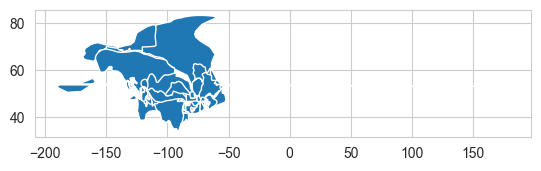

In [20]:
indigenous_df_filtered.plot()

In [21]:
indigenous_df_filtered = indigenous_df_filtered.to_crs("EPSG:4269")

In [22]:
# import exploration projects
exploration_proj_df = gpd.read_file('Exploration_Projects_with_Resource_Estimate.geojson')
exploration_proj_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   OBJECTID     14 non-null     int64   
 1   Name         14 non-null     object  
 2   Company      14 non-null     object  
 3   Long_NAD83   14 non-null     float64 
 4   Lat_NAD83    14 non-null     float64 
 5   Location     14 non-null     object  
 6   Comm_1       14 non-null     object  
 7   Other_Comm   14 non-null     object  
 8   Dep_Type     14 non-null     object  
 9   Host_Rock    14 non-null     object  
 10  Geo_Age      14 non-null     object  
 11  Geo_Unit     14 non-null     object  
 12  NI_43_101    14 non-null     object  
 13  R_Category   14 non-null     object  
 14  Ref_Rep      14 non-null     object  
 15  Ref_PEA_Rep  14 non-null     object  
 16  R_Summary    14 non-null     object  
 17  geometry     14 non-null     geometry
dtypes: float64(2), geometry(

Clearly not a lot of data in this file. Choose to ignore. 

In [25]:
# do not include for now, causing git issues
# exploration_areas_df = gpd.read_file('Prospective_Areas_for_Mineral_Exploration_(DIG_2019-0025).geojson')
# exploration_areas_df.info()
# exploration_lithium_df = exploration_areas_df[exploration_areas_df.Commodity == "Lithium"]

# exploration_lithium_df = exploration_lithium_df.to_crs("EPSG:4269")

In [26]:
# import bedrock temps
# First tried to use the .asc files produced in DIG_2021_0031. Struggled with coordinate reference systems, ended up using DIG_2021_0029. 
# leduc_temps = np.loadtxt("DIG_2021_0031/Leduc_temp_base_10tm.asc", skiprows=6)

In [27]:
# fix the leduc temps 
# ncols = 1375
# nrows = 1857
# xllcorner = 178064.39312135
# yllcorner = 5426307.3815287
# cellsize = 500
# 
# leduc_temps_forgdf = []
# 
# for y in range(nrows):
#     for x in range(ncols):
#         # print(str(x)+ ", "+ str(y))
#         x_temp = xllcorner + x*cellsize
#         y_temp = yllcorner + (nrows - y - 1)*cellsize
#         value_temp = leduc_temps[x][y]
#         leduc_temps_forgdf.append([x_temp, y_temp, value_temp])
# 
# leduc_temps_df = pd.DataFrame(leduc_temps_forgdf, columns=["x", "y", "value"])
# 
# leduc_temps_df = leduc_temps_df.replace(-9999, np.nan)
# leduc_temps_df = leduc_temps_df.dropna(axis=0)
# 
# 
# # gpd.points_from_xy() where (x,y) is (lon,lat).
# # leduc_temps_df["long"] = leduc_temps_df["y"]
# # leduc_temps_df["lat"] = leduc_temps_df["x"]
# 
# leduc_temps_gdf = gpd.GeoDataFrame(leduc_temps_df, geometry=gpd.points_from_xy(leduc_temps_df["x"], leduc_temps_df["y"]), crs="epsg:4269")

In [28]:
# looking at DIG-2021-0029 Data for across Alberta!
# Imports temperature readings across Alberta
ab_temps_df = pd.read_csv('DIG_2021_0029/DIG_2021_0029.txt', sep="\t")

In [29]:
ab_temps_df

,UWI,Lat_NAD83,Long_NAD83,Source,Type,Depth_m,El_masl28,Temp_rec_C,Temp_est_C,Residual_C,Publisher
0,100010100505W400,49.351607,-110.545992,Log,LAS,1131.00,-140.10,35.0,38.5,-1.2,Alberta Geological Survey
1,100010100717W400,49.527096,-112.177438,Log,LAS,1011.00,-58.60,32.0,34.0,-1.5,Alberta Geological Survey
2,100010100816W400,49.613088,-112.039618,Log,MF,1003.71,-102.41,32.8,34.7,-0.3,Alberta Geological Survey
3,100010100823W400,49.611610,-112.987400,Nieuw,D,1282.50,-326.80,33.4,33.4,2.9,Alberta Geological Survey
4,100010100823W400,49.611610,-112.987400,Nieuw,D,1252.50,-296.80,33.6,33.6,2.3,Alberta Geological Survey
...,...,...,...,...,...,...,...,...,...,...,...
230697,1W0133211907W600,59.385980,-119.178980,Nieuw,A,1721.00,-1125.40,73.0,73.0,-0.7,Alberta Geological Survey
230698,1W0133211907W600,59.385976,-119.178983,Log,MF,1991.26,-1395.66,73.1,85.3,-2.3,Alberta Geological Survey
230699,1W0133301816W402,50.570670,-112.158040,Nieuw,A,1118.00,-345.70,37.0,37.0,0.5,Alberta Geological Survey
230700,1W0133505324W500,53.626498,-117.440531,Log,LAS,2773.20,-1488.70,75.0,91.8,0.1,Alberta Geological Survey


In [30]:
ab_temps_gdf = gpd.GeoDataFrame(ab_temps_df, geometry=gpd.points_from_xy(ab_temps_df["Long_NAD83"], ab_temps_df["Lat_NAD83"]), crs="EPSG:4269")

In [31]:
ab_temps_gdf

,UWI,Lat_NAD83,Long_NAD83,Source,Type,Depth_m,El_masl28,Temp_rec_C,Temp_est_C,Residual_C,Publisher,geometry
0,100010100505W400,49.351607,-110.545992,Log,LAS,1131.00,-140.10,35.0,38.5,-1.2,Alberta Geological Survey,POINT (-110.54599 49.35161)
1,100010100717W400,49.527096,-112.177438,Log,LAS,1011.00,-58.60,32.0,34.0,-1.5,Alberta Geological Survey,POINT (-112.17744 49.52710)
2,100010100816W400,49.613088,-112.039618,Log,MF,1003.71,-102.41,32.8,34.7,-0.3,Alberta Geological Survey,POINT (-112.03962 49.61309)
3,100010100823W400,49.611610,-112.987400,Nieuw,D,1282.50,-326.80,33.4,33.4,2.9,Alberta Geological Survey,POINT (-112.98740 49.61161)
4,100010100823W400,49.611610,-112.987400,Nieuw,D,1252.50,-296.80,33.6,33.6,2.3,Alberta Geological Survey,POINT (-112.98740 49.61161)
...,...,...,...,...,...,...,...,...,...,...,...,...
230697,1W0133211907W600,59.385980,-119.178980,Nieuw,A,1721.00,-1125.40,73.0,73.0,-0.7,Alberta Geological Survey,POINT (-119.17898 59.38598)
230698,1W0133211907W600,59.385976,-119.178983,Log,MF,1991.26,-1395.66,73.1,85.3,-2.3,Alberta Geological Survey,POINT (-119.17898 59.38598)
230699,1W0133301816W402,50.570670,-112.158040,Nieuw,A,1118.00,-345.70,37.0,37.0,0.5,Alberta Geological Survey,POINT (-112.15804 50.57067)
230700,1W0133505324W500,53.626498,-117.440531,Log,LAS,2773.20,-1488.70,75.0,91.8,0.1,Alberta Geological Survey,POINT (-117.44053 53.62650)


<Axes: >

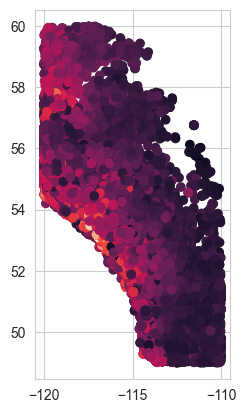

In [32]:
ab_temps_gdf.plot(column="Temp_rec_C")

In [33]:
ab_temps_gdf = ab_temps_gdf.to_crs("EPSG:4269")

In [34]:
# import earthquake data
# placeholder for working with shapefiles https://gis.stackexchange.com/questions/113799/reading-shapefile-in-python
# 
# shape = fiona.open("my_shapefile.shp")
# print(shape.schema)
# 
# #first feature of the shapefile
# first = shape.next()
# print(first) # (GeoJSON format)


In [35]:
# import 
bedrock_df = gpd.read_file("Bedrock_Geology_of_Alberta_(DIG_2013-0018).geojson")
bedrock_df

,FID,RGB,ColorGroup,Unit_Name,Lithology,Environ,Age,GeolRegion,GlobalID,SHAPE_Length,SHAPE_Area,geometry
0,1,0-168-168,O,Ordovician strata,"Dolostone, sandstone, limestone, and shale",Shallow marine,Ordovician,Mountains and Foothills,{5D4E7981-96AD-46D3-B20D-03834F8F26B0},0.195295,0.001023,"MULTIPOLYGON (((-116.27235 51.96273, -116.2716..."
1,2,0-168-168,O,Ordovician strata,"Dolostone, sandstone, limestone, and shale",Shallow marine,Ordovician,Mountains and Foothills,{4C9C83AA-2487-48D6-97E1-B958F2E9F215},0.782399,0.000798,"MULTIPOLYGON (((-116.12520 51.89036, -116.1261..."
2,3,0-168-168,O,Ordovician strata,"Dolostone, sandstone, limestone, and shale",Shallow marine,Ordovician,Mountains and Foothills,{586BEB27-A59D-4B4D-92E1-9F32990ED0FA},0.786313,0.006660,"MULTIPOLYGON (((-116.69867 52.00802, -116.6967..."
3,4,0-168-168,O,Ordovician strata,"Dolostone, sandstone, limestone, and shale",Shallow marine,Ordovician,Mountains and Foothills,{C5E3C465-C6E5-45CE-960C-56FA8C5F0A25},0.113385,0.000182,"MULTIPOLYGON (((-117.57597 52.12897, -117.5777..."
4,5,0-168-168,O,Ordovician strata,"Dolostone, sandstone, limestone, and shale",Shallow marine,Ordovician,Mountains and Foothills,{5A296764-4150-4DCD-966E-15719D7CE67C},0.153343,0.000904,"MULTIPOLYGON (((-117.05134 52.14112, -117.0551..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1170,1171,235-125-100,PG_NG,Hand Hills Formation,Gravel and sand,Fluvial,Neogene,Plains,{A274AF7B-F14F-4955-BFE4-D2F5198837B6},0.076744,0.000166,"MULTIPOLYGON (((-112.34328 51.56652, -112.3396..."
1171,1172,235-125-100,PG_NG,Hand Hills Formation,Gravel and sand,Fluvial,Neogene,Plains,{AC923127-7D63-4B1A-8CBC-34E4CCAA328A},0.017274,0.000020,"MULTIPOLYGON (((-112.32287 51.56399, -112.3266..."
1172,1173,235-125-100,PG_NG,Hand Hills Formation,Gravel and sand,Fluvial,Neogene,Plains,{D645BF49-093C-4394-9678-23022F93DB2A},0.026378,0.000048,"MULTIPOLYGON (((-112.33345 51.57521, -112.3311..."
1173,1174,255-167-127,PG,Upland Gravel (Halverson Ridge),Gravel and sand,Fluvial,Paleogene,Plains,{05C8CA1F-06E6-4DBE-913D-CE42525DA49A},2.764545,0.043796,"MULTIPOLYGON (((-118.87641 57.34017, -118.8728..."


<Axes: >

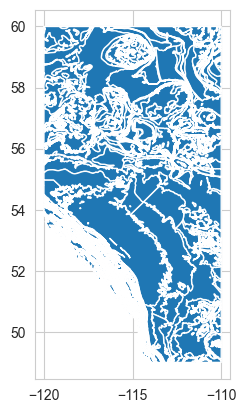

In [36]:
bedrock_df.plot()

In [37]:
bedrock_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [38]:
bedrock_df = bedrock_df.to_crs("EPSG:4269")

In [39]:
# import ATS reference grid for gridding things out!
# Import V4-1_TWP.shp, as the other files are too big and brick computer :(

ATS_gdf = gpd.read_file("ATS_Polygons_SHP_Geographic/V4-1_TWP.shp")

In [40]:
ATS_gdf

,FILE_NAME,TRM,M,RGE,TWP,DESCRIPTOR,PID,geometry
0,410068,068104,4,10,68,TWP-068 RGE-10 MER-4,410068,"POLYGON ((-111.37867 54.84966, -111.37867 54.8..."
1,410069,069104,4,10,69,TWP-069 RGE-10 MER-4,410069,"POLYGON ((-111.37872 54.93694, -111.37872 54.9..."
2,410071,071104,4,10,71,TWP-071 RGE-10 MER-4,410071,"POLYGON ((-111.39131 55.11179, -111.39131 55.1..."
3,410074,074104,4,10,74,TWP-074 RGE-10 MER-4,410074,"POLYGON ((-111.39135 55.46085, -111.39135 55.4..."
4,410075,075104,4,10,75,TWP-075 RGE-10 MER-4,410075,"POLYGON ((-111.41034 55.46081, -111.41612 55.4..."
...,...,...,...,...,...,...,...,...
7249,506009,009065,5,6,9,TWP-009 RGE-06 MER-5,506009,"POLYGON ((-114.67888 49.69925, -114.67888 49.6..."
7250,506013,013065,5,6,13,TWP-013 RGE-06 MER-5,506013,"POLYGON ((-114.68396 50.04849, -114.68396 50.0..."
7251,506016,016065,5,6,16,TWP-016 RGE-06 MER-5,506016,"POLYGON ((-114.68935 50.31003, -114.68935 50.3..."
7252,506019,019065,5,6,19,TWP-019 RGE-06 MER-5,506019,"POLYGON ((-114.69384 50.65916, -114.69383 50.6..."


<Axes: >

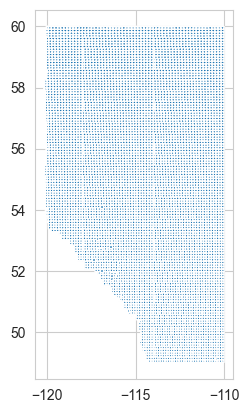

In [41]:
ATS_gdf.plot()

In [42]:
ATS_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [43]:
ATS_gdf

,FILE_NAME,TRM,M,RGE,TWP,DESCRIPTOR,PID,geometry
0,410068,068104,4,10,68,TWP-068 RGE-10 MER-4,410068,"POLYGON ((-111.37867 54.84966, -111.37867 54.8..."
1,410069,069104,4,10,69,TWP-069 RGE-10 MER-4,410069,"POLYGON ((-111.37872 54.93694, -111.37872 54.9..."
2,410071,071104,4,10,71,TWP-071 RGE-10 MER-4,410071,"POLYGON ((-111.39131 55.11179, -111.39131 55.1..."
3,410074,074104,4,10,74,TWP-074 RGE-10 MER-4,410074,"POLYGON ((-111.39135 55.46085, -111.39135 55.4..."
4,410075,075104,4,10,75,TWP-075 RGE-10 MER-4,410075,"POLYGON ((-111.41034 55.46081, -111.41612 55.4..."
...,...,...,...,...,...,...,...,...
7249,506009,009065,5,6,9,TWP-009 RGE-06 MER-5,506009,"POLYGON ((-114.67888 49.69925, -114.67888 49.6..."
7250,506013,013065,5,6,13,TWP-013 RGE-06 MER-5,506013,"POLYGON ((-114.68396 50.04849, -114.68396 50.0..."
7251,506016,016065,5,6,16,TWP-016 RGE-06 MER-5,506016,"POLYGON ((-114.68935 50.31003, -114.68935 50.3..."
7252,506019,019065,5,6,19,TWP-019 RGE-06 MER-5,506019,"POLYGON ((-114.69384 50.65916, -114.69383 50.6..."


In [45]:
# import saline storage resources in here
# Saline resources used as carbon sequestration locations as according to ATLAS V, the vast majority of alberta's storage potential is in its saline resources. 

storage_gdf = gpd.read_file("natcarb_saline_poly_shapefile/Natcarb_Saline_poly_shapefile/NATCARB_Saline_Poly_v1502.shp")

In [46]:
storage_gdf = storage_gdf.to_crs("EPSG:4269")

In [47]:
storage_gdf_filtered = sjoin(storage_gdf, canada, how='inner')

<Axes: >

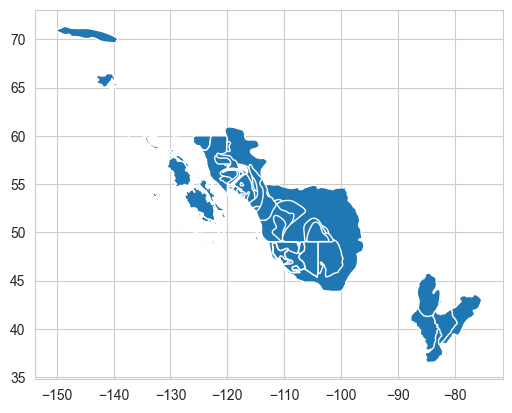

In [48]:
storage_gdf_filtered.plot()

In [49]:
storage_gdf_filtered

,PARTNERSHI,ARRA_PROJE,RESOURCE_N,BASIN_NAME,ASSESSED,CYCLE_OF_L,OVERLAP,DUPLICATE,Shape_Leng,Shape_Area,...,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA
8,WESTCARB,None,Ampitheatre Basin,None,0,"Atlas IV, v1",0,0,7.828058e+04,1.461371e+08,...,None,None,None,None,None,None,None,None,None,None
14,WESTCARB,None,Beaverdell Basin,None,0,"Atlas IV, v1",0,0,4.514859e+04,9.153976e+07,...,None,None,None,None,None,None,None,None,None,None
15,WESTCARB,None,Bellingham Subbasin,None,0,"Atlas IV, v1",0,0,2.978558e+05,1.291079e+09,...,None,None,None,None,None,None,None,None,None,None
19,WESTCARB,None,Blue Mountain Subbasin,None,0,"Atlas IV, v1",0,0,3.116686e+04,6.521778e+07,...,None,None,None,None,None,None,None,None,None,None
21,WESTCARB,None,Bowser Basin,None,0,"Atlas IV, v1",0,0,2.292357e+06,5.708476e+10,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,BSCSP,None,Morrison,Central Montana Uplift,1,"Atlas V, v1",0,0,2.610471e+06,7.592101e+10,...,None,None,None,None,None,None,None,None,None,None
459,BSCSP,None,Sawtooth,Central Montana Uplift,1,"Atlas V, v1",0,0,1.229970e+06,3.066651e+10,...,None,None,None,None,None,None,None,None,None,None
469,BSCSP,None,Swift,Central Montana Uplift,1,"Atlas V, v1",0,0,2.338124e+06,7.698779e+10,...,None,None,None,None,None,None,None,None,None,None
501,BSCSP,None,MissionCanyon,Central Montana Uplift,1,"Atlas V, v1",1,0,3.672090e+05,7.786276e+09,...,None,None,None,None,None,None,None,None,None,None


NOW: GRAPHING

Text(0.5, 1.0, 'Geothermal Temp Measurements in Alberta')

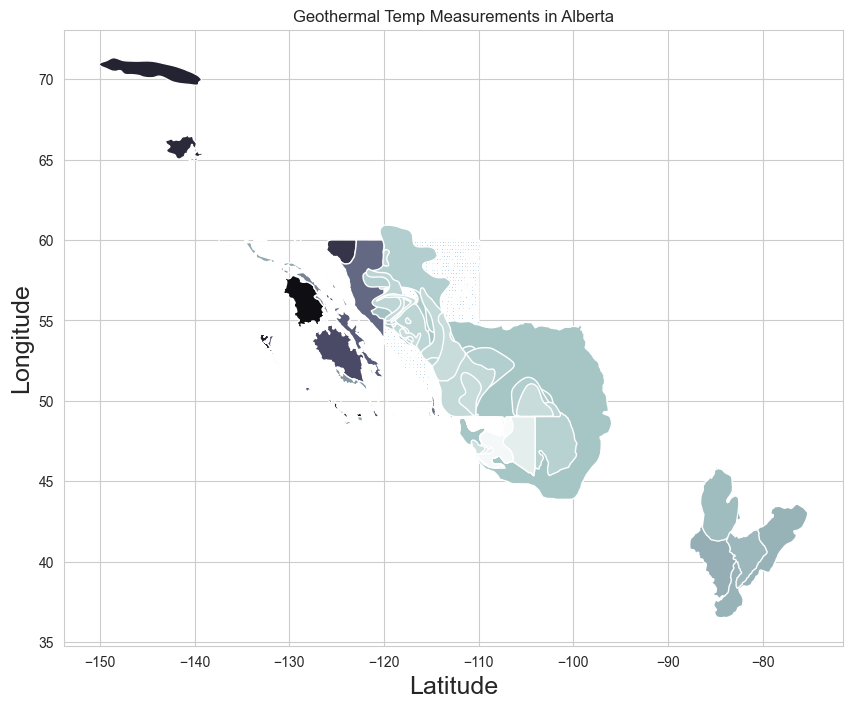

In [50]:
ax = bedrock_df.plot(figsize=(15, 8), cmap="gist_earth", alpha=0.75, column="ColorGroup")
# exploration_lithium_df.plot(ax=ax, color='grey', edgecolor='k', label='Exploration_Lithium', legend=True)
# lithium_df.plot(column= "Li_mg_L", cmap="Reds", ax=ax, legend=True)
# ab_temps_gdf.plot(ax=ax, cmap="Reds", column = "Temp_rec_C", legend=True)
ATS_gdf.plot(ax=ax)
storage_gdf_filtered.plot(ax=ax, cmap="bone", legend=True)
plt.xlabel('Latitude', fontsize=18)
plt.ylabel('Longitude', fontsize=18)
plt.title("Geothermal Temp Measurements in Alberta")

MAKE OUR MULTI-CRITERIA SYSTEM

In [51]:
# base it off our ATS grid
MCM_gdf = ATS_gdf.copy()

<Axes: >

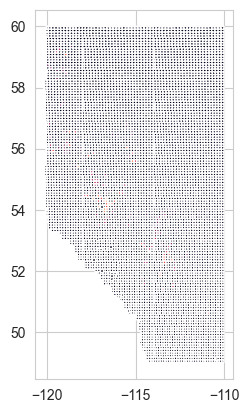

In [52]:
# Put avg lithium readings into the MCM 
temp_sjoin_gdf = gpd.sjoin(ATS_gdf, lithium_df)
temp_dict = temp_sjoin_gdf[["FILE_NAME", "Li_mg_L"]]
temp_lithium = temp_dict.groupby("FILE_NAME").mean().reset_index()

MCM_gdf = MCM_gdf.merge(temp_lithium, how="left", on="FILE_NAME")
MCM_gdf["Li_mg_L"] = MCM_gdf["Li_mg_L"].fillna(0)
MCM_gdf.plot(column="Li_mg_L")

<Axes: >

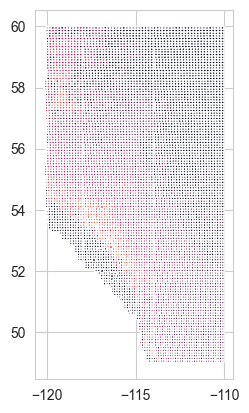

In [53]:
# Put temperatures into the MCM
temp_temp_sjoin_gdf = gpd.sjoin(ATS_gdf, ab_temps_gdf)
temp_dict = temp_temp_sjoin_gdf[["FILE_NAME", "Temp_rec_C"]]
temp_temp = temp_dict.groupby("FILE_NAME").mean().reset_index()

MCM_gdf = MCM_gdf.merge(temp_temp, how="left", on="FILE_NAME")
MCM_gdf["Temp_rec_C"] = MCM_gdf["Temp_rec_C"].fillna(0)
MCM_gdf.plot(column="Temp_rec_C")

In [54]:
# Put CCUS potential into the MCM

# neighbourhoods['stations'] = neighbourhoods.apply(lambda row: bikeshare_stations_gdf.within(row.geometry).sum(), axis=1)

MCM_gdf["CCUS_Units"] = MCM_gdf.apply(lambda row: storage_gdf_filtered.intersects(row.geometry).sum(), axis=1)


<Axes: >

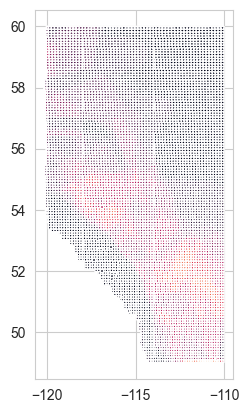

In [55]:
MCM_gdf.plot(column="CCUS_Units")

In [56]:
MCM_gdf.sort_values(by="CCUS_Units", ascending=False)

,FILE_NAME,TRM,M,RGE,TWP,DESCRIPTOR,PID,geometry,Li_mg_L,Temp_rec_C,CCUS_Units
516,409001,001094,4,9,1,TWP-001 RGE-09 MER-4,409001,"POLYGON ((-111.07453 49.08641, -111.07452 49.0...",0.8,31.811538,9
5816,406001,001064,4,6,1,TWP-001 RGE-06 MER-4,406001,"POLYGON ((-110.80704 48.99844, -110.80732 48.9...",0.0,34.728571,9
1233,407001,001074,4,7,1,TWP-001 RGE-07 MER-4,407001,"POLYGON ((-110.94058 48.99804, -110.94085 48.9...",0.3,33.690909,9
581,410001,001104,4,10,1,TWP-001 RGE-10 MER-4,410001,"POLYGON ((-111.28061 49.08644, -111.27511 49.0...",0.0,33.075000,9
6314,408001,001084,4,8,1,TWP-001 RGE-08 MER-4,408001,"POLYGON ((-111.07416 48.99769, -111.07444 48.9...",0.0,33.651064,9
...,...,...,...,...,...,...,...,...,...,...,...
5365,404094,094044,4,4,94,TWP-094 RGE-04 MER-4,404094,"POLYGON ((-110.48882 57.11914, -110.48882 57.1...",0.0,0.000000,0
5366,404097,097044,4,4,97,TWP-097 RGE-04 MER-4,404097,"POLYGON ((-110.49274 57.38087, -110.49274 57.3...",0.0,0.000000,0
5367,404099,099044,4,4,99,TWP-099 RGE-04 MER-4,404099,"POLYGON ((-110.49837 57.55541, -110.49837 57.5...",0.0,0.000000,0
5368,404100,100044,4,4,100,TWP-100 RGE-04 MER-4,404100,"POLYGON ((-110.49838 57.64272, -110.49838 57.6...",0.0,0.000000,0


Apply the minmax scaler to the rows to normalize the scores

In [57]:
scaler = MinMaxScaler()

In [69]:
# fit and transform the data
df_norm = pd.DataFrame(scaler.fit_transform(MCM_gdf[["Li_mg_L", "CCUS_Units", "Temp_rec_C"]]))


In [70]:
df_norm.rename(columns={0: "Li_norm", 1: "CCUS_norm", 2: "Temp_norm"}, inplace=True)

In [71]:
df_norm 

,Li_norm,CCUS_norm,Temp_norm
0,0.000000,0.111111,0.000000
1,0.023929,0.000000,0.289310
2,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
...,...,...,...
7249,0.000000,0.111111,0.000000
7250,0.000000,0.111111,0.000000
7251,0.000000,0.111111,0.000000
7252,0.000000,0.000000,0.000000


In [72]:
MCM_gdf

,FILE_NAME,TRM,M,RGE,TWP,DESCRIPTOR,PID,geometry,Li_mg_L,Temp_rec_C,CCUS_Units
0,410068,068104,4,10,68,TWP-068 RGE-10 MER-4,410068,"POLYGON ((-111.37867 54.84966, -111.37867 54.8...",0.00,0.000000,1
1,410069,069104,4,10,69,TWP-069 RGE-10 MER-4,410069,"POLYGON ((-111.37872 54.93694, -111.37872 54.9...",3.35,41.950000,0
2,410071,071104,4,10,71,TWP-071 RGE-10 MER-4,410071,"POLYGON ((-111.39131 55.11179, -111.39131 55.1...",0.00,0.000000,0
3,410074,074104,4,10,74,TWP-074 RGE-10 MER-4,410074,"POLYGON ((-111.39135 55.46085, -111.39135 55.4...",0.00,0.000000,0
4,410075,075104,4,10,75,TWP-075 RGE-10 MER-4,410075,"POLYGON ((-111.41034 55.46081, -111.41612 55.4...",0.00,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
7249,506009,009065,5,6,9,TWP-009 RGE-06 MER-5,506009,"POLYGON ((-114.67888 49.69925, -114.67888 49.6...",0.00,0.000000,1
7250,506013,013065,5,6,13,TWP-013 RGE-06 MER-5,506013,"POLYGON ((-114.68396 50.04849, -114.68396 50.0...",0.00,0.000000,1
7251,506016,016065,5,6,16,TWP-016 RGE-06 MER-5,506016,"POLYGON ((-114.68935 50.31003, -114.68935 50.3...",0.00,0.000000,1
7252,506019,019065,5,6,19,TWP-019 RGE-06 MER-5,506019,"POLYGON ((-114.69384 50.65916, -114.69383 50.6...",0.00,0.000000,0


In [75]:
MCM_gdf.shape

(7254, 11)

In [76]:
df_norm.shape

(7254, 3)

In [78]:
MCM_gdf = MCM_gdf.merge(df_norm, how="left", left_index=True, right_index=True)

In [79]:
MCM_gdf

,FILE_NAME,TRM,M,RGE,TWP,DESCRIPTOR,PID,geometry,Li_mg_L,Temp_rec_C,CCUS_Units,Li_norm,CCUS_norm,Temp_norm
0,410068,068104,4,10,68,TWP-068 RGE-10 MER-4,410068,"POLYGON ((-111.37867 54.84966, -111.37867 54.8...",0.00,0.000000,1,0.000000,0.111111,0.000000
1,410069,069104,4,10,69,TWP-069 RGE-10 MER-4,410069,"POLYGON ((-111.37872 54.93694, -111.37872 54.9...",3.35,41.950000,0,0.023929,0.000000,0.289310
2,410071,071104,4,10,71,TWP-071 RGE-10 MER-4,410071,"POLYGON ((-111.39131 55.11179, -111.39131 55.1...",0.00,0.000000,0,0.000000,0.000000,0.000000
3,410074,074104,4,10,74,TWP-074 RGE-10 MER-4,410074,"POLYGON ((-111.39135 55.46085, -111.39135 55.4...",0.00,0.000000,0,0.000000,0.000000,0.000000
4,410075,075104,4,10,75,TWP-075 RGE-10 MER-4,410075,"POLYGON ((-111.41034 55.46081, -111.41612 55.4...",0.00,0.000000,0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7249,506009,009065,5,6,9,TWP-009 RGE-06 MER-5,506009,"POLYGON ((-114.67888 49.69925, -114.67888 49.6...",0.00,0.000000,1,0.000000,0.111111,0.000000
7250,506013,013065,5,6,13,TWP-013 RGE-06 MER-5,506013,"POLYGON ((-114.68396 50.04849, -114.68396 50.0...",0.00,0.000000,1,0.000000,0.111111,0.000000
7251,506016,016065,5,6,16,TWP-016 RGE-06 MER-5,506016,"POLYGON ((-114.68935 50.31003, -114.68935 50.3...",0.00,0.000000,1,0.000000,0.111111,0.000000
7252,506019,019065,5,6,19,TWP-019 RGE-06 MER-5,506019,"POLYGON ((-114.69384 50.65916, -114.69383 50.6...",0.00,0.000000,0,0.000000,0.000000,0.000000


In [89]:
MCM_gdf["CCUS_norm"] = MCM_gdf["CCUS_norm"].astype(bool).astype(int)

In [90]:
MCM_gdf

,FILE_NAME,TRM,M,RGE,TWP,DESCRIPTOR,PID,geometry,Li_mg_L,Temp_rec_C,CCUS_Units,Li_norm,CCUS_norm,Temp_norm,Score
0,410068,068104,4,10,68,TWP-068 RGE-10 MER-4,410068,"POLYGON ((-111.37867 54.84966, -111.37867 54.8...",0.00,0.000000,1,0.000000,1,0.000000,0.0
1,410069,069104,4,10,69,TWP-069 RGE-10 MER-4,410069,"POLYGON ((-111.37872 54.93694, -111.37872 54.9...",3.35,41.950000,0,0.023929,0,0.289310,0.0
2,410071,071104,4,10,71,TWP-071 RGE-10 MER-4,410071,"POLYGON ((-111.39131 55.11179, -111.39131 55.1...",0.00,0.000000,0,0.000000,0,0.000000,0.0
3,410074,074104,4,10,74,TWP-074 RGE-10 MER-4,410074,"POLYGON ((-111.39135 55.46085, -111.39135 55.4...",0.00,0.000000,0,0.000000,0,0.000000,0.0
4,410075,075104,4,10,75,TWP-075 RGE-10 MER-4,410075,"POLYGON ((-111.41034 55.46081, -111.41612 55.4...",0.00,0.000000,0,0.000000,0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7249,506009,009065,5,6,9,TWP-009 RGE-06 MER-5,506009,"POLYGON ((-114.67888 49.69925, -114.67888 49.6...",0.00,0.000000,1,0.000000,1,0.000000,0.0
7250,506013,013065,5,6,13,TWP-013 RGE-06 MER-5,506013,"POLYGON ((-114.68396 50.04849, -114.68396 50.0...",0.00,0.000000,1,0.000000,1,0.000000,0.0
7251,506016,016065,5,6,16,TWP-016 RGE-06 MER-5,506016,"POLYGON ((-114.68935 50.31003, -114.68935 50.3...",0.00,0.000000,1,0.000000,1,0.000000,0.0
7252,506019,019065,5,6,19,TWP-019 RGE-06 MER-5,506019,"POLYGON ((-114.69384 50.65916, -114.69383 50.6...",0.00,0.000000,0,0.000000,0,0.000000,0.0


In [91]:
MCM_gdf["Score"] = MCM_gdf["Temp_norm"] * MCM_gdf["CCUS_norm"] * MCM_gdf["Li_norm"]

In [92]:
MCM_gdf.sort_values(by="Score", ascending=False)

,FILE_NAME,TRM,M,RGE,TWP,DESCRIPTOR,PID,geometry,Li_mg_L,Temp_rec_C,CCUS_Units,Li_norm,CCUS_norm,Temp_norm,Score
919,521059,059215,5,21,59,TWP-059 RGE-21 MER-5,521059,"POLYGON ((-117.03264 54.15216, -117.02647 54.1...",120.0,86.010811,4,0.857143,1,0.593178,0.508438
2348,519058,058195,5,19,58,TWP-058 RGE-19 MER-5,519058,"POLYGON ((-116.67702 54.06477, -116.67702 54.0...",108.5,89.383929,5,0.775000,1,0.616441,0.477742
5599,502042,042025,5,2,42,TWP-042 RGE-02 MER-5,502042,"POLYGON ((-114.19353 52.66872, -114.18899 52.6...",140.0,68.878325,5,1.000000,1,0.475023,0.475023
449,519057,057195,5,19,57,TWP-057 RGE-19 MER-5,519057,"POLYGON ((-116.67701 53.97745, -116.67701 53.9...",100.0,94.955128,5,0.714286,1,0.654863,0.467759
2689,518062,062185,5,18,62,TWP-062 RGE-18 MER-5,518062,"POLYGON ((-116.55158 54.32702, -116.55158 54.3...",130.0,72.975758,4,0.928571,1,0.503281,0.467332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,519083,083195,5,19,83,TWP-083 RGE-19 MER-5,519083,"POLYGON ((-116.84783 56.15958, -116.84783 56.1...",0.0,0.000000,1,0.000000,1,0.000000,0.000000
2506,519078,078195,5,19,78,TWP-078 RGE-19 MER-5,519078,"POLYGON ((-116.81348 55.81052, -116.80789 55.8...",0.0,48.233333,2,0.000000,1,0.332644,0.000000
2505,519068,068195,5,19,68,TWP-068 RGE-19 MER-5,519068,"POLYGON ((-116.74698 54.85064, -116.74698 54.8...",0.0,60.232000,4,0.000000,1,0.415393,0.000000
2504,519063,063195,5,19,63,TWP-063 RGE-19 MER-5,519063,"POLYGON ((-116.72342 54.41435, -116.72342 54.4...",0.0,69.430583,4,0.000000,1,0.478832,0.000000


Text(0.5, 1.0, 'Potential for co-generation of Lithium, Geothermal Energy, and \n Carbon Sequestration in Alberta')

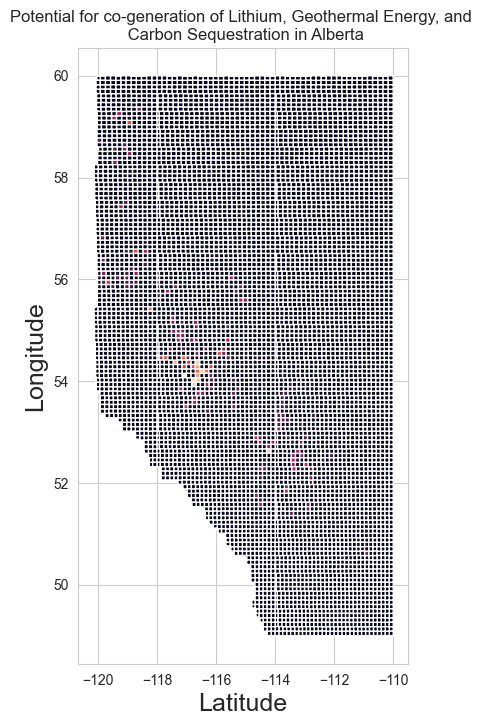

In [96]:
ax = bedrock_df.plot(figsize=(15, 8), cmap="gist_earth", alpha=0.75, column="ColorGroup")
# exploration_lithium_df.plot(ax=ax, color='grey', edgecolor='k', label='Exploration_Lithium', legend=True)
# lithium_df.plot(column= "Li_mg_L", cmap="Reds", ax=ax, legend=True)
# ab_temps_gdf.plot(ax=ax, cmap="Reds", column = "Temp_rec_C", legend=True)
# ATS_gdf.plot(ax=ax)
MCM_gdf.plot(ax=ax, column="Score")
# storage_gdf_filtered.plot(ax=ax, cmap="bone", legend=True)
plt.xlabel('Latitude', fontsize=18)
plt.ylabel('Longitude', fontsize=18)
plt.title("Potential for co-generation of Lithium, Geothermal Energy, and \n Carbon Sequestration in Alberta")
